In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%y %H:%M")
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
pop_mean = df['TotalPrice'].mean()
pop_std = df['TotalPrice'].std()

In [10]:
sample = df['TotalPrice'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
sample_std = sample.std()

In [11]:
print("모집단 평균:", pop_mean)
print("모집단 표준편차:", pop_std)
print("표본 평균:", sample_mean)
print("표본 표준편차:", sample_std)

모집단 평균: 17.98779487699964
모집단 표준편차: 378.81082350615196
표본 평균: 16.832069999999998
표본 표준편차: 64.46732773087352


모집단 평균(17.99)과 표본 평균(16.83)은 비슷 표본이 모집단 평균을 잘 근사

표본 표준편차(64.47)는 모집단(378.81)보다 훨씬 작음 극단값이 표본에 포함되지 않아 분산이 줄어든 결과

중심극한정리: 표본 크기가 충분히 크면 표본평균 분포는 정규분포에 가까워지고, 모집단 평균을 안정적으로 추정 가능

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [12]:
country_counts = df['Country'].value_counts()

In [13]:
top2 = country_counts.index[:2]
print("상위 2개 국가:", top2.tolist())
mean_values = df.groupby('Country')['TotalPrice'].mean()
print("국가별 평균 TotalPrice:")
print(mean_values.loc[top2])

상위 2개 국가: ['United Kingdom', 'Germany']
국가별 평균 TotalPrice:
Country
United Kingdom    16.525065
Germany           23.348943
Name: TotalPrice, dtype: float64


In [14]:
data1 = df[df['Country'] == top2[0]]['TotalPrice']
data2 = df[df['Country'] == top2[1]]['TotalPrice']

In [15]:
t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
print("t-통계량:", t_stat)
print("p-값:", f"{p_val:.30f}")

t-통계량: -10.046360185819829
p-값: 0.000000000000000000000009823416


In [16]:
if p_val < 0.05:
    print("→ 두 국가의 평균 차이는 통계적으로 유의하다.")
else:
    print("→ 두 국가의 평균 차이는 통계적으로 유의하지 않다.")

→ 두 국가의 평균 차이는 통계적으로 유의하다.


t-통계량이 -10으로 매우 크고, p-값이 0에 가깝다 두 국가의 평균 차이는 통계적으로 유의하다.

1종 오류: 실제로 차이가 없는데 있다고 결론 내리는 오류 (이번 경우 p-값이 극도로 작아 가능성 거의 없음).

2종 오류: 실제로 차이가 있는데 없다고 결론 내리는 오류 (이번 경우도 사실상 발생하지 않음).

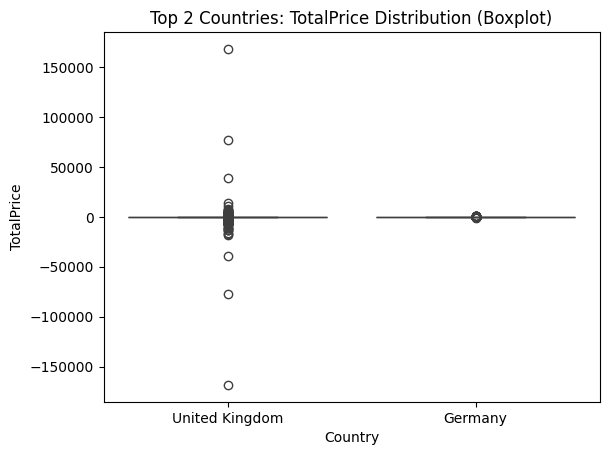

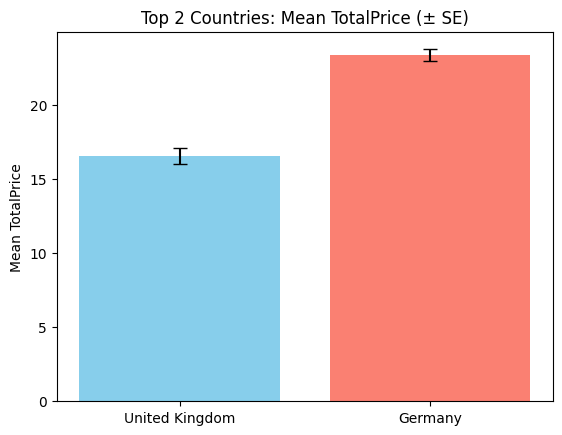

In [17]:
sns.boxplot(x="Country", y="TotalPrice", data=df[df['Country'].isin(top2)])
plt.title("Top 2 Countries: TotalPrice Distribution (Boxplot)")
plt.show()

means = [data1.mean(), data2.mean()]
errors = [data1.std()/np.sqrt(len(data1)), data2.std()/np.sqrt(len(data2))]

plt.bar(top2, means, yerr=errors, capsize=5, color=['skyblue','salmon'])
plt.title("Top 2 Countries: Mean TotalPrice (± SE)")
plt.ylabel("Mean TotalPrice")
plt.show()

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [18]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['WeekType'] = df['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [19]:
stats_summary = df.groupby('WeekType')['UnitPrice'].agg(
    mean='mean',
    median='median',
    std='std',
    var='var',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)
print(stats_summary)

              mean  median         std           var   q25   q75
WeekType                                                        
Weekday   4.843425    2.10  103.032058  10615.604927  1.25  4.13
Weekend   2.887824    1.85    7.959497     63.353599  1.25  3.75


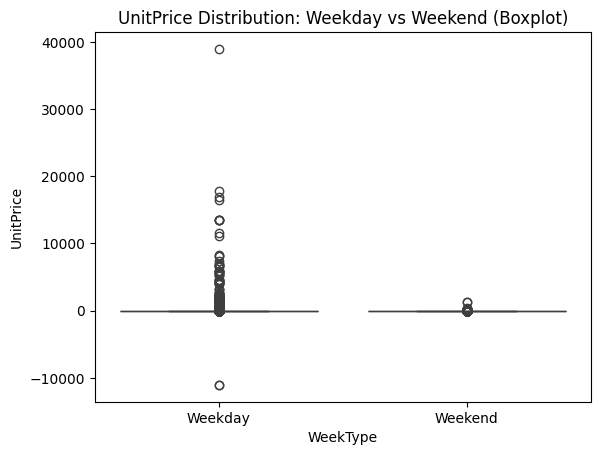

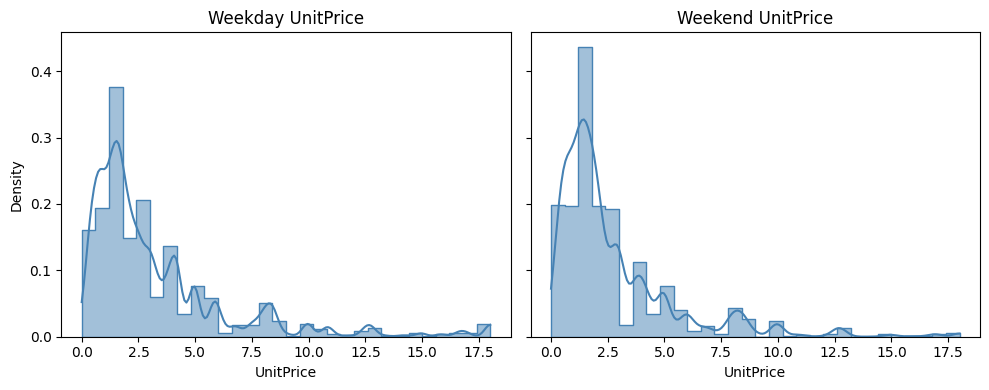

In [20]:
sns.boxplot(x='WeekType', y='UnitPrice', data=df)
plt.title("UnitPrice Distribution: Weekday vs Weekend (Boxplot)")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

upper = df['UnitPrice'].quantile(0.99)

df_clip = df.copy()
df_clip['UnitPrice'] = np.clip(df_clip['UnitPrice'], 0, upper)

for ax, wt in zip(axes, ["Weekday", "Weekend"]):
    subset = df_clip[df_clip["WeekType"] == wt]["UnitPrice"]
    sns.histplot(subset, bins=30, kde=True, element="step", stat="density", ax=ax, color="steelblue")
    ax.set_title(f"{wt} UnitPrice")
    ax.set_xlabel("UnitPrice")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

주중과 주말 모두 UnitPrice는 낮은 값에 집중되어 있으나, 주중은 평균이 더 높고 이상치가 많아 분산이 크다. 반면 주말은 평균이 낮고 분포가 좁아 상대적으로 안정적이다. 따라서 주중과 주말의 UnitPrice 분포는 중심과 변동성에서 뚜렷한 차이를 보인다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [21]:
df_clean = df.dropna(subset=['Quantity','UnitPrice','Country'])
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
df_encoded = pd.get_dummies(df_clean, columns=['Country'], drop_first=True)

X = df_encoded[['UnitPrice','DayOfWeek','InvoiceMonth'] +
               [col for col in df_encoded.columns if col.startswith('Country_')]]
y = df_encoded['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("결정계수 R²:", r2)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

결정계수 R²: 0.027712992412047832
                         Feature  Coefficient
0                      UnitPrice    -0.014375
1                      DayOfWeek    -0.178656
2                   InvoiceMonth    -0.044597
3                Country_Austria   -59.483298
4                Country_Bahrain   -54.567395
5                Country_Belgium   -59.185711
6                 Country_Brazil   -58.536289
7                 Country_Canada   -51.505847
8        Country_Channel Islands   -58.595094
9                 Country_Cyprus   -61.126291
10        Country_Czech Republic   -44.852487
11               Country_Denmark   -49.013274
12                  Country_EIRE   -51.919574
13    Country_European Community   -62.864346
14               Country_Finland   -55.746983
15                Country_France   -57.450354
16               Country_Germany   -57.555536
17                Country_Greece   -60.574320
18             Country_Hong Kong   -53.580255
19               Country_Iceland   -57.058034
20  

회귀분석 결과, 단가(UnitPrice)는 음의 영향을 보여 가격이 높을수록 판매 수량이 감소하는 경향을 보였다. 국가(Country) 변수는 국가별 판매량 차이를 설명했으며, 일부 국가는 양의 계수를 보여 상대적으로 판매량이 많았다. 요일(DayOfWeek)과 월(InvoiceMonth) 역시 시기적 요인에 따른 변동을 반영하였다. 그러나 결정계수(R²)는 약 0.03으로 설명력이 낮아, 본 모델은 판매량 예측보다는 주요 요인의 방향성을 탐색하는 데 의미가 있다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [22]:
df['IsReturn'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%Y-%m-%d %H:%M:%S")
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

df_clean = df.dropna(subset=['Quantity','UnitPrice','Country'])
df_clean = df_clean[(df_clean['UnitPrice'] > 0) & (df_clean['Quantity'] != 0)]

df_encoded = pd.get_dummies(df_clean, columns=['Country'], drop_first=True)

X = df_encoded[['UnitPrice','DayOfWeek','InvoiceMonth'] +
               [col for col in df_encoded.columns if col.startswith('Country_')]]
y = df_encoded['IsReturn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106001      4]
 [  1862     12]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    106005
           1       0.75      0.01      0.01      1874

    accuracy                           0.98    107879
   macro avg       0.87      0.50      0.50    107879
weighted avg       0.98      0.98      0.97    107879



출력된 혼동행렬을 보면, 반품 거래(1)는 전체 데이터에서 차지하는 비율이 매우 작아서, 모델이 대부분을 0(반품 아님)으로 예측하는 경향이 강합니다.
실제 반품을 예측하는 성능을 보면 정밀도(Precision)는 0.75로 비교적 높았으나, 재현율(Recall)은 0.01로 매우 낮아 대부분의 반품을 놓쳤다. 이로 인해 F1-score 역시 0.01에 불과하여 반품 예측 성능은 사실상 미흡하다. 따라서 본 모델은 불균형 데이터 문제로 인해 반품 탐지력이 떨어진다
단순 로지스틱 회귀 모델은 반품 여부를 효과적으로 예측하기에 한계가 있으며, 이는 데이터의 불균형으로 인한 성능 저하에서 기인한다. 따라서 반품 예측 성능을 개선하기 위해서는 SMOTE와 같은 오버샘플링 기법이나 class_weight='balanced' 옵션을 활용한 클래스 가중치 조정 등 불균형 데이터 처리 방법을 적용할 필요가 있다.

In [23]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_res, y_res)
y_pred_smote = model_smote.predict(X_test)

print("\n=== Logistic Regression (SMOTE 적용) ===")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


=== Logistic Regression (SMOTE 적용) ===
[[76324 29681]
 [ 1151   723]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83    106005
           1       0.02      0.39      0.04      1874

    accuracy                           0.71    107879
   macro avg       0.50      0.55      0.44    107879
weighted avg       0.97      0.71      0.82    107879



In [24]:
model_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("=== Logistic Regression (class_weight='balanced') ===")
print(confusion_matrix(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))

=== Logistic Regression (class_weight='balanced') ===
[[79292 26713]
 [ 1164   710]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85    106005
           1       0.03      0.38      0.05      1874

    accuracy                           0.74    107879
   macro avg       0.51      0.56      0.45    107879
weighted avg       0.97      0.74      0.84    107879



기본 로지스틱 회귀 모델은 반품 클래스의 Recall이 0.01에 불과해 탐지력이 거의 없었다. SMOTE를 적용한 모델은 Recall을 0.39까지 끌어올려 반품을 놓치는 비율을 크게 줄였으나, Precision이 0.02로 급격히 낮아져 오탐이 많아졌다. 반면 class_weight='balanced'를 적용한 모델은 Recall을 개선하면서 Precision도 일정 수준 유지해, 기본 모델 대비 불균형 데이터 문제를 완화하는 효과를 보였다.